## Main Objective

#### The main goal of this analysis is **predict** the price based of cars properties.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
pd.set_option('display.max_columns',500)
warnings.filterwarnings("ignore")
%matplotlib inline  

# EDA


## Data Description

- ##### Dataset containing cars scraped from AutoScout24.
- ##### 5 categorical feature
- ##### 4 numeric feature

## Feature Description

- ##### mileage
- ##### make 
- ##### model
- ##### fuel
- ##### gear
- ##### offerType
- ##### price
- ##### hp
- ##### year




In [2]:
df = pd.read_csv("../input/cars-germany/autoscout24-germany-dataset.csv")
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


### Missing values

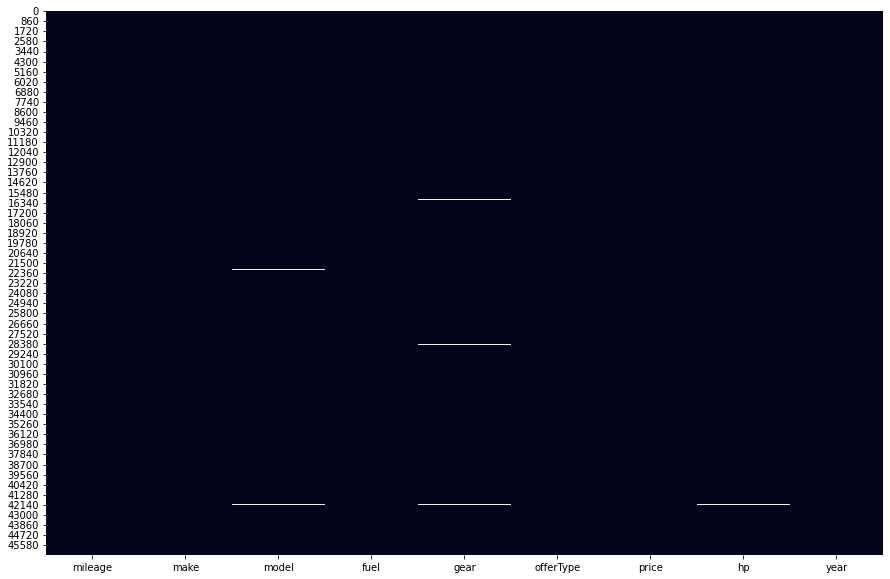

In [3]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isna(),annot=False,cbar=False)
plt.show()

In [4]:
for column in df.columns:
    print(f'{column} : % {round((df[column].isna().sum())/(len(df[column]))*100,5)}')

mileage : % 0.0
make : % 0.0
model : % 0.30816
fuel : % 0.0
gear : % 0.3922
offerType : % 0.0
price : % 0.0
hp : % 0.06249
year : % 0.0


In [5]:
print(f"Sample size : {df.shape[0]}")
df.isnull().sum()

Sample size : 46405


mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

In [6]:
df.dropna(inplace=True)
print(f"Sample size : {df.shape[0]}")
df.isnull().sum()

Sample size : 46071


mileage      0
make         0
model        0
fuel         0
gear         0
offerType    0
price        0
hp           0
year         0
dtype: int64

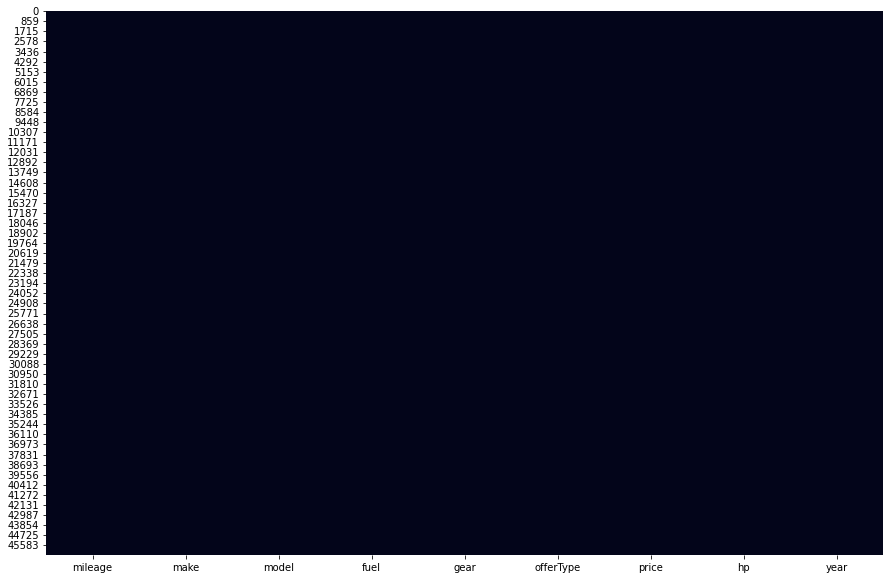

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isna(),annot=False,cbar=False)
plt.show()

### Descriptive statistics

In [8]:
df.describe()

,mileage,price,hp,year
count,4.607100e+04,4.607100e+04,46071.000000,46071.000000
mean,7.123314e+04,1.656312e+04,132.992663,2016.012155
std,6.245413e+04,1.927960e+04,75.074689,3.155555
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.990000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.100000e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


In [9]:
df.describe(include=["bool","object"])

,make,model,fuel,gear,offerType
count,46071,46071,46071,46071,46071
unique,71,835,11,3,5
top,Volkswagen,Golf,Gasoline,Manual,Used
freq,6907,1489,28720,30309,39822


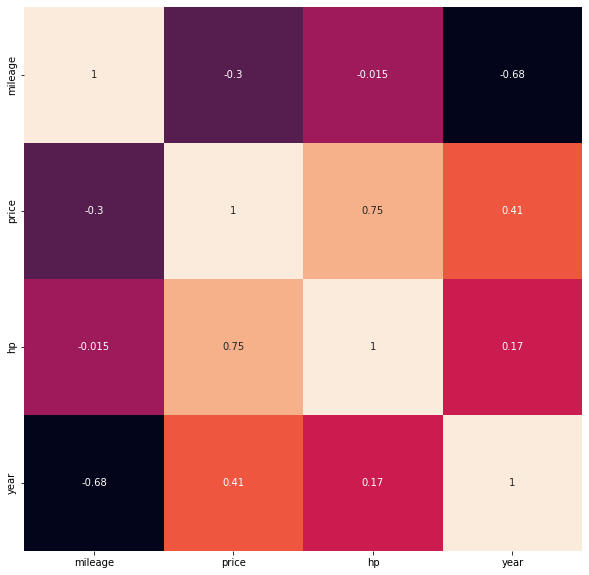

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cbar=False)
plt.show()

In [11]:
df.drop(inplace=True,labels=['make','model'],axis=1)
print(df.columns)
df.head()

Index(['mileage', 'fuel', 'gear', 'offerType', 'price', 'hp', 'year'], dtype='object')


,mileage,fuel,gear,offerType,price,hp,year
0,235000,Diesel,Manual,Used,6800,116.0,2011
1,92800,Gasoline,Manual,Used,6877,122.0,2011
2,149300,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Gasoline,Manual,Used,6950,156.0,2011


### Visualization of Data Distribution

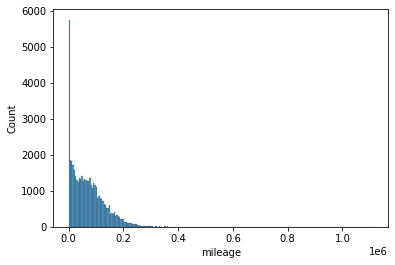

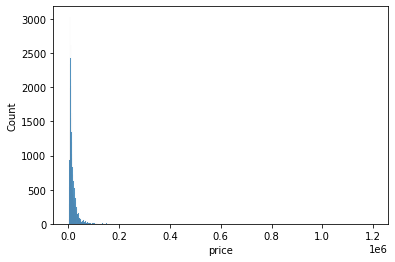

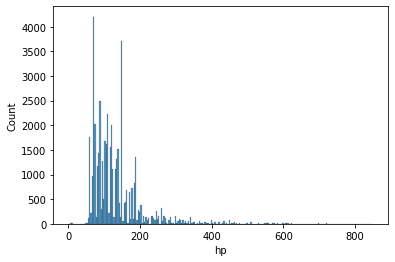

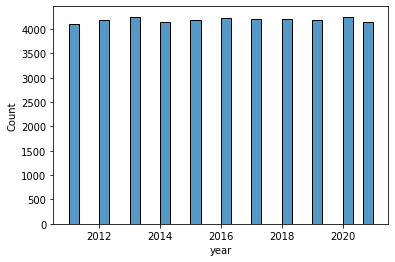

In [12]:
for column in [column for column in df.columns if df[column].dtype!= 'object']:
    sns.histplot(df[column])
    plt.show()

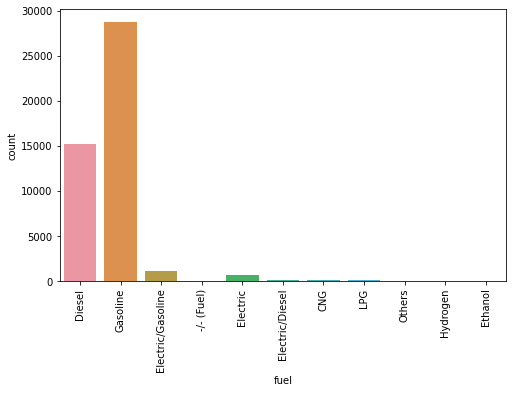

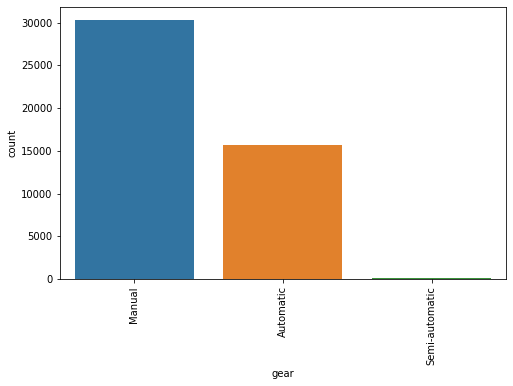

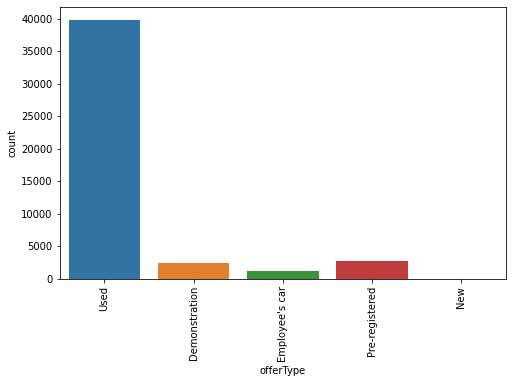

In [13]:
for column in [column for column in df.columns if df[column].dtype== 'object']:
    plt.figure(figsize=(8,5))
    sns.countplot(df[column])
    plt.xticks(rotation='90')
    plt.show()

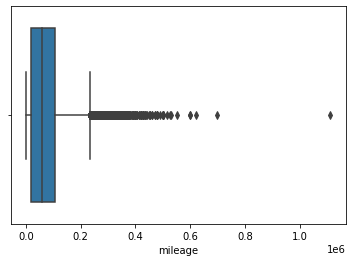

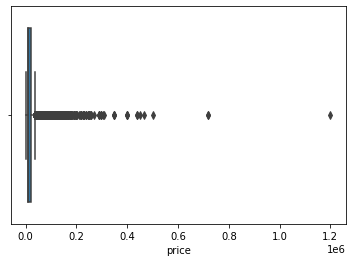

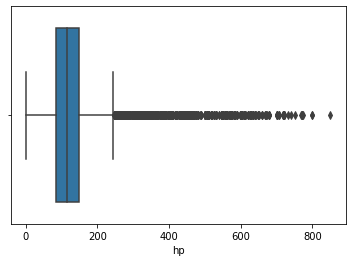

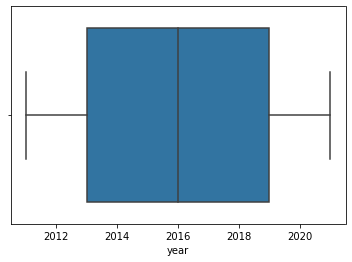

In [14]:
for column in [column for column in df.columns if df[column].dtype!= 'object']:
    sns.boxplot(df[column])
    plt.show()

# Handling Categorical Features




    The features used in regression analysis/models must be quantitative(numeric/measurable quantity). However, sometimes using categorical variables as predictive variables can increase the precision of the estimation. In this analysis they are "fuel","gear" and "offerType". When using categorical variables, it doesn’t make sense to just assign values like 1, 2, 3, to values like “Manual”, “Semi-automatic”, and “Automatic” because it doesn’t make sense to say that Semi-automatic cars are twice as good/valuable as Manual cars or that Automatic cars are three times as good/valuable as Manual cars.

    Instead, the solution is to use dummy variables. These are variables that we create specifically for regression analysis that take on one of two values: 0 or 1. To avoid dummy variable trap we must create n-1 dummy variable. Where n is the number of different values that the categorical variable can take on.
     
> #### For more detail about "Dummy Variable Trap" click [here](!https://www.learndatasci.com/glossary/dummy-variable-trap/).

    
  

In [15]:
df.describe(include=['bool','object'])

,fuel,gear,offerType
count,46071,46071,46071
unique,11,3,5
top,Gasoline,Manual,Used
freq,28720,30309,39822


In [16]:
df["fuel"].unique()

array(['Diesel', 'Gasoline', 'Electric/Gasoline', '-/- (Fuel)',
       'Electric', 'Electric/Diesel', 'CNG', 'LPG', 'Others', 'Hydrogen',
       'Ethanol'], dtype=object)

In [17]:
df["fuel"] = df["fuel"].replace(['Electric/Diesel','Electric/Gasoline'],'Electric')
df["fuel"] = df["fuel"].replace(['-/- (Fuel)','CNG','LPG','Others', 'Hydrogen', 'Ethanol'],"Gas")
df["fuel"].unique()

array(['Diesel', 'Gasoline', 'Electric', 'Gas'], dtype=object)

In [18]:
df["gear"].unique()

array(['Manual', 'Automatic', 'Semi-automatic'], dtype=object)

In [19]:
df["offerType"].unique()

array(['Used', 'Demonstration', "Employee's car", 'Pre-registered', 'New'],
      dtype=object)

In [20]:
df[(df["mileage"]==0) & (df["offerType"]!="New")]

,mileage,fuel,gear,offerType,price,hp,year
2276,0,Electric,Manual,Used,44750,204.0,2021
2909,0,Diesel,Automatic,Demonstration,79999,300.0,2021
5673,0,Gasoline,Automatic,Demonstration,23450,140.0,2020
6110,0,Gasoline,Manual,Pre-registered,17250,91.0,2021
6762,0,Gasoline,Automatic,Used,12990,72.0,2021
...,...,...,...,...,...,...,...
45900,0,Gasoline,Manual,Pre-registered,13990,71.0,2021
45914,0,Gasoline,Manual,Demonstration,27290,179.0,2021
45979,0,Gasoline,Manual,Pre-registered,18490,95.0,2021
45996,0,Gasoline,Manual,Pre-registered,18080,131.0,2021


In [21]:
df_temp = df.copy()
df = pd.get_dummies(df,prefix=["fuel","gear","offerType"],drop_first=True)
df.head()

,mileage,price,hp,year,fuel_Electric,fuel_Gas,fuel_Gasoline,gear_Manual,gear_Semi-automatic,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
0,235000,6800,116.0,2011,0,0,0,1,0,0,0,0,1
1,92800,6877,122.0,2011,0,0,1,1,0,0,0,0,1
2,149300,6900,160.0,2011,0,0,1,1,0,0,0,0,1
3,96200,6950,110.0,2011,0,0,1,1,0,0,0,0,1
4,156000,6950,156.0,2011,0,0,1,1,0,0,0,0,1


In [22]:
cols=list(df.columns)
cols.remove("price")
cols.append("price")
cols
df = df[cols]
df.head()

,mileage,hp,year,fuel_Electric,fuel_Gas,fuel_Gasoline,gear_Manual,gear_Semi-automatic,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used,price
0,235000,116.0,2011,0,0,0,1,0,0,0,0,1,6800
1,92800,122.0,2011,0,0,1,1,0,0,0,0,1,6877
2,149300,160.0,2011,0,0,1,1,0,0,0,0,1,6900
3,96200,110.0,2011,0,0,1,1,0,0,0,0,1,6950
4,156000,156.0,2011,0,0,1,1,0,0,0,0,1,6950


In [23]:
from datetime import date
curr_year = date.today().year
df["year"] = df["year"].apply(lambda x:curr_year-x)
df.head()

,mileage,hp,year,fuel_Electric,fuel_Gas,fuel_Gasoline,gear_Manual,gear_Semi-automatic,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used,price
0,235000,116.0,11,0,0,0,1,0,0,0,0,1,6800
1,92800,122.0,11,0,0,1,1,0,0,0,0,1,6877
2,149300,160.0,11,0,0,1,1,0,0,0,0,1,6900
3,96200,110.0,11,0,0,1,1,0,0,0,0,1,6950
4,156000,156.0,11,0,0,1,1,0,0,0,0,1,6950


## Outliers

In [24]:
def delete_outlier_with_z(data,col,threshold_value):
    temp_df = data.copy()
    if isinstance(col,str):
        mean = temp_df[col].mean()
        std = temp_df[col].std()
        temp_df["z"] = temp_df[col].apply(lambda x: abs(mean-x)/std)
        temp_df = temp_df[(temp_df["z"]>-threshold_value)&(temp_df["z"]<threshold_value)]
    elif isinstance(col,list):
        for colname in col:
            mean = temp_df[colname].mean()
            std = temp_df[colname].std()
            temp_df["z"] = temp_df[colname].apply(lambda x: abs(mean-x)/std)
            temp_df = temp_df[(temp_df["z"]>-threshold_value)&(temp_df["z"]<threshold_value)]
    temp_df.drop(["z"],inplace=True,axis=1)
    return temp_df

def delete_outlier_with_iqr(data,col,constant_value):
    if isinstance(col,str):
        q3 = np.quantile(data[col], 0.75)
        q1 = np.quantile(data[col], 0.25)
        iqr = q3 - q1
        lower = q1 - constant_value*iqr
        upper = q3 + constant_value*iqr
        data = data[(data[col]>lower) & (data[col]<upper)]    
    elif isinstance(col,list):
        for colname in col:
            q3 = np.quantile(data[colname], 0.75)
            q1 = np.quantile(data[colname], 0.25)
            iqr = q3 - q1
            lower = q1 - constant_value*iqr
            upper = q3 + constant_value*iqr
            data = data[(data[colname]>lower) & (data[colname]<upper)]
    return data
        

In [25]:

print(df.shape[0])
cleaned_df_z = delete_outlier_with_z(data=df,col=["price","hp","year","mileage"],threshold_value=3)
print(f"After removing outlier with z value sample size : {cleaned_df_z.shape[0]}")

cleaned_df_iqr = delete_outlier_with_iqr(data=df,col=["price","hp","year","mileage"],constant_value=1.5)
print(f"After removing outlier with iqr value sample size : {cleaned_df_iqr.shape[0]}")


46071
After removing outlier with z value sample size : 44138
After removing outlier with iqr value sample size : 41088


### Data distribution after deleting outliers

##### Z Score

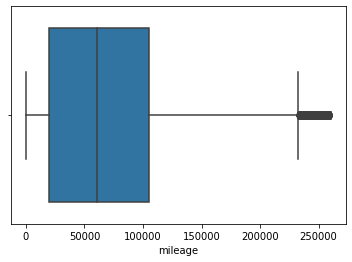

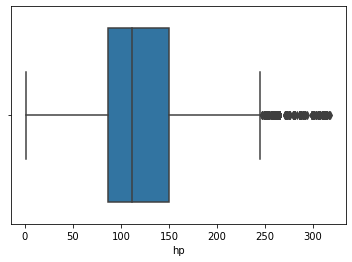

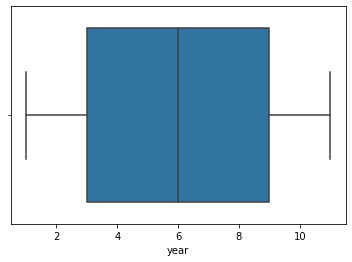

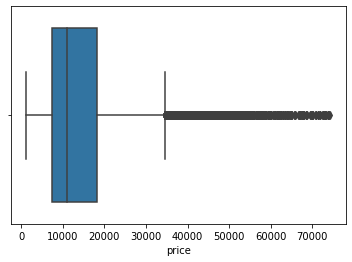

In [26]:
for column in ["mileage","hp","year","price"]:
    sns.boxplot(cleaned_df_z[column])
    plt.show()

##### IQR

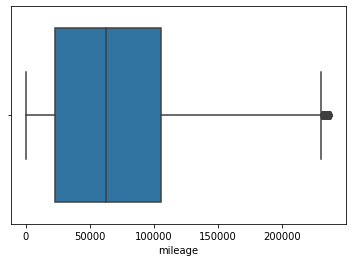

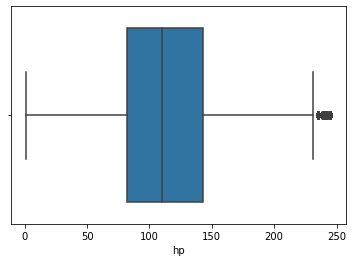

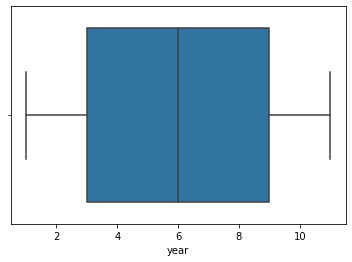

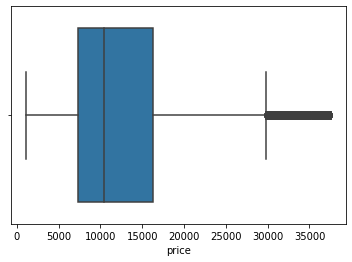

In [27]:
for column in ["mileage","hp","year","price"]:
    sns.boxplot(cleaned_df_iqr[column])
    plt.show()

> ### It can be observed that after deleting outliers with IQR, less abnormal data remains.

# Modeling the Data

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import KFold
from bayes_opt import BayesianOptimization
def root_mae(y_test,y_pred):
    return np.sqrt(mean_squared_error(y_test,y_pred))
def root_mse(y_test,y_pred):
    return np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
def adj_r2_score(y_test,y_pred):
    r2 = r2_score(y_test,y_pred)
    return 1 - ((1-r2)*(y_test.shape[0]-1)/(y_test.shape[0]-y_test.shape[1]-1))


metrics_dict = {"r2":r2_score,"adjr2":adj_r2_score,"mae":mean_absolute_error,"rmae":root_mae,"mse":mean_squared_error,"rmse":root_mse}
def evaluate_model(estimator,X,y,metrics,n_splits,shuffle,random_state):
    result = {}
    kfold = KFold(n_splits=n_splits,random_state=random_state,shuffle=shuffle)
    for train_index,test_index in kfold.split(X):
        X_train, X_test, y_train, y_test = (X.iloc[train_index, :], X.iloc[test_index, :], y.iloc[train_index], y.iloc[test_index])
        estimator.fit(X_train,y_train)
        pred = estimator.predict(X_test)
        for metric in metrics:
            if metric not in result.keys():
                result[metric] = []
            result[metric].append(metrics_dict[metric](y_test,pred))
    for metric in metrics:
        result[metric] = np.mean(result[metric])
    return result
    
y_iqr = cleaned_df_iqr.iloc[:,len(cleaned_df_iqr.columns)-1:]
y_z = cleaned_df_z.iloc[:,len(cleaned_df_z.columns)-1:]
X_iqr = cleaned_df_iqr.iloc[:,:len(cleaned_df_iqr.columns)-1]
X_z = cleaned_df_z.iloc[:,:len(cleaned_df_z.columns)-1]


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

In [30]:
sc = StandardScaler()
X_iqr_scaled = sc.fit_transform(X_iqr)
X_iqr_scaled = pd.DataFrame(data = X_iqr_scaled, columns = X_iqr.columns)
X_iqr_scaled.head()

,mileage,hp,year,fuel_Electric,fuel_Gas,fuel_Gasoline,gear_Manual,gear_Semi-automatic,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
0,2.966810,0.017747,1.549464,-0.190577,-0.084894,-1.368094,0.62065,-0.035939,-0.149479,-0.014802,-0.257555,0.376786
1,0.404938,0.165935,1.549464,-0.190577,-0.084894,0.730944,0.62065,-0.035939,-0.149479,-0.014802,-0.257555,0.376786
2,1.422841,1.104459,1.549464,-0.190577,-0.084894,0.730944,0.62065,-0.035939,-0.149479,-0.014802,-0.257555,0.376786
3,0.466192,-0.130441,1.549464,-0.190577,-0.084894,0.730944,0.62065,-0.035939,-0.149479,-0.014802,-0.257555,0.376786
4,1.543548,1.005667,1.549464,-0.190577,-0.084894,0.730944,0.62065,-0.035939,-0.149479,-0.014802,-0.257555,0.376786


### Linear Regression

In [31]:
pipe = Pipeline([("lr",LinearRegression())])
result = evaluate_model(estimator=pipe,X=X_iqr,y=y_iqr,metrics=["r2","rmse"],n_splits=5,shuffle=True,random_state=23)
result

{'r2': 0.8358321614856532, 'rmse': 8.03041729844751}

In [32]:
degrees = [2,3]

for degree in degrees:
    pipe = Pipeline([("Degree",PolynomialFeatures(degree = degree)),("LinearR",LinearRegression())])
    r = evaluate_model(estimator=pipe,X=X_iqr,y=y_iqr,metrics=["adjr2","rmse"],n_splits=5,shuffle=True,random_state=23)
    print(f"degree : {degree} -/- results : {r}")

degree : 2 -/- results : {'adjr2': 0.880890792007509, 'rmse': 7.869875045652018}
degree : 3 -/- results : {'adjr2': 0.8471463983945048, 'rmse': 7.986999458695536}


In [33]:
pipe = Pipeline([("Degree",PolynomialFeatures(degree = 2)),("LinearR",LinearRegression())])
r = evaluate_model(estimator=pipe,X=X_iqr,y=y_iqr,metrics=["adjr2","rmse"],n_splits=5,shuffle=True,random_state=23)
r

{'adjr2': 0.880890792007509, 'rmse': 7.869875045652018}

### Random Forest Regression

In [34]:
pipe = Pipeline([("Degree",PolynomialFeatures(degree = 2)),("RandomForestRegressor",RandomForestRegressor(n_estimators=200))])
r = evaluate_model(estimator=pipe,X=X_iqr,y=y_iqr,metrics=["adjr2","rmse"],n_splits=5,shuffle=True,random_state=23)
r

{'adjr2': 0.8905497347705549, 'rmse': 7.827313847073961}

### Gradient Boosting Regression

In [35]:
pipe = Pipeline([("GradientBoostingRegressor",GradientBoostingRegressor(learning_rate=0.2,n_estimators=200))])
r = evaluate_model(estimator=pipe,X=X_iqr,y=y_iqr,metrics=["r2","rmse"],n_splits=5,shuffle=True,random_state=23)
r

{'r2': 0.89818538068189, 'rmse': 7.791439729559097}

### Lasso Regression

In [36]:
lasso_alphas = []
lasso = LassoCV(alphas = None,cv=5,n_jobs=-1,max_iter=10000,normalize=True)
lasso.fit(X_iqr_scaled,y_iqr)
lasso_alphas.append(lasso.alpha_)
for i in [2,3]:
    pipe = Pipeline([("poly",PolynomialFeatures(degree=i)),("scaler",StandardScaler())])
    X_transformed = pipe.fit_transform(X_iqr)
    lasso.fit(X_transformed,y_iqr)
    lasso_alphas.append(lasso.alpha_)

In [37]:
pipe = Pipeline([("lasso",Lasso(alpha = lasso_alphas[0]))])
r = evaluate_model(estimator=pipe,X=X_iqr_scaled,y=y_iqr,metrics=["r2","rmse"],n_splits=5,shuffle=True,random_state=23)
r

{'r2': 0.8358321761620253, 'rmse': 8.030417265424575}

In [38]:
pipe = Pipeline([("poly",PolynomialFeatures(degree=2)),("scaler",StandardScaler()),("lasso",Lasso(alpha = lasso_alphas[1]))])
r = evaluate_model(estimator=pipe,X=X_iqr,y=y_iqr,metrics=["adjr2","rmse"],n_splits=5,shuffle=True,random_state=23)
r

{'adjr2': 0.8809050969339646, 'rmse': 7.869814605507907}

In [39]:
pipe = Pipeline([("poly",PolynomialFeatures(degree=3)),("scaler",StandardScaler()),("lasso",Lasso(alpha = lasso_alphas[2]))])
r = evaluate_model(estimator=pipe,X=X_iqr,y=y_iqr,metrics=["adjr2","rmse"],n_splits=5,shuffle=True,random_state=23)
r

{'adjr2': 0.8629579470072308, 'rmse': 7.922598859877809}

### Ridge Regression

In [40]:
ridge_alphas = []
ridge = RidgeCV(alphas = np.linspace(3,-3,50),cv=5,normalize=True,scoring="neg_mean_squared_error")
ridge.fit(X_iqr_scaled,y_iqr)
ridge_alphas.append(ridge.alpha_)
for i in [2,3]:
    pipe = Pipeline([("poly",PolynomialFeatures(degree=i)),("scaler",StandardScaler())])
    X_transformed = pipe.fit_transform(X_iqr)
    ridge.fit(X_transformed,y_iqr)
    ridge_alphas.append(ridge.alpha_)

In [41]:
pipe = Pipeline([("ridge",Ridge(alpha = ridge_alphas[0]))])
r = evaluate_model(estimator=pipe,X=X_iqr_scaled,y=y_iqr,metrics=["r2","rmse"],n_splits=5,shuffle=True,random_state=17)
r

{'r2': 0.8359346385998723, 'rmse': 8.030274651555228}

In [42]:
pipe = Pipeline([("poly",PolynomialFeatures(degree=2)),("scaler",StandardScaler()),("ridge",Ridge(alpha = ridge_alphas[1]))])
r = evaluate_model(estimator=pipe,X=X_iqr,y=y_iqr,metrics=["adjr2","rmse"],n_splits=5,shuffle=True,random_state=23)
r

{'adjr2': 0.880890912040965, 'rmse': 7.869874571510889}

In [43]:
pipe = Pipeline([("poly",PolynomialFeatures(degree=3)),("scaler",StandardScaler()),("ridge",Ridge(alpha = ridge_alphas[2]))])
r = evaluate_model(estimator=pipe,X=X_iqr,y=y_iqr,metrics=["adjr2","rmse"],n_splits=5,shuffle=True,random_state=23)
r

{'adjr2': 0.861233531745086, 'rmse': 7.928354872013562}

### ElasticNet

In [44]:
elastic_alphas = []
elastic = ElasticNetCV(alphas = np.linspace(3,-3,50),cv=5,l1_ratio=np.linspace(0,1,50))
elastic.fit(X_iqr_scaled,y_iqr)
elastic_alphas.append(ridge.alpha_)
for i in [2,3]:
    pipe = Pipeline([("poly",PolynomialFeatures(degree=i)),("scaler",StandardScaler())])
    X_transformed = pipe.fit_transform(X_iqr)
    elastic.fit(X_transformed,y_iqr)
    elastic_alphas.append(elastic.alpha_)

In [45]:
pipe = Pipeline([("elastic",ElasticNet(alpha = elastic_alphas[0]))])
r = evaluate_model(estimator=pipe,X=X_iqr_scaled,y=y_iqr,metrics=["r2","rmse"],n_splits=5,shuffle=True,random_state=23)
r

{'r2': 0.835357306927827, 'rmse': 8.031877465643904}

In [46]:
pipe = Pipeline([("poly",PolynomialFeatures(degree=2)),("scaler",StandardScaler()),("elastic",ElasticNet(alpha = elastic_alphas[1]))])
r = evaluate_model(estimator=pipe,X=X_iqr,y=y_iqr,metrics=["adjr2","rmse"],n_splits=5,shuffle=True,random_state=23)
r

{'adjr2': 0.7917227009072025, 'rmse': 8.149433396519203}

In [47]:
pipe = Pipeline([("poly",PolynomialFeatures(degree=3)),("scaler",StandardScaler()),("elastic",ElasticNet(alpha = elastic_alphas[2]))])
r = evaluate_model(estimator=pipe,X=X_iqr,y=y_iqr,metrics=["adjr2","rmse"],n_splits=5,shuffle=True,random_state=23)
r

{'adjr2': 0.8454202567004605, 'rmse': 8.00033954318828}

## Best Model

In [48]:
pipe = Pipeline([("GradientBoostingRegressor",GradientBoostingRegressor(learning_rate=0.2,n_estimators=200))])
X_train, X_test, y_train, y_test = train_test_split(X_iqr,y_iqr,test_size=0.3,random_state=23)
pipe.fit(X_train,y_train)
pred = pipe.predict(X_test)
print(f"R2 Score : {r2_score(y_test,pred)}")
print(f"Root Mean Squared Error : {root_mse(y_test,pred)}")

R2 Score : 0.9022412853775833
Root Mean Squared Error : 7.784842135249708
